In [1]:
def init_MacOS(iseed):
    #initialization

    tf.random.set_seed(iseed)

In [2]:
#Function for plotting training history
def PlotHistory(history, metrics):
    '''
    metrics = {MSE|MAE|...}
    '''
    #get epoch
    hist = pd.DataFrame(history.history)
    hist["Epoch"] = history.epoch

    #plot fig
    plt.figure()
    plt.xlabel("Number of epochs")
    plt.ylabel(f"{metrics} of {target}")
    plt.plot(hist["Epoch"], hist[metrics],        label="Training")
    plt.plot(hist["Epoch"], hist["val_"+metrics], label="Validation")

    plt.yscale('log')
    plt.legend()
    plt.show()

    #MSE

In [3]:
#Function for plotting actual-predected plot
def PlotCorrelation(y_train, y_predict):
    plt.axis('equal')
    plt.axis('square')
    plt.xlabel(f"Actual")
    plt.ylabel(f"Predected")
    plt.scatter(y_train, y_predict, color='blue', alpha=0.3)
    plt.xlim([-1.2, 0])
    plt.ylim([-1.2, 0])
    plt.plot([-100, 100], [-100, 100], color='gray')
    plt.show()

#R2 score

In [4]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [5]:
#version information
import platform
import matplotlib
import tensorflow
import sklearn
import keras

ver = "0.0.1" 

print(f"Version information:")
print(f" This program : {ver}")
print(f" Python       : {platform.python_version()}")
print(f" Pandas       : {pd.__version__}")
print(f" Numpy        : {np.__version__}")
print(f" Matplotlib   : {matplotlib.__version__}")
print(f" TensorFlow   : {tensorflow.__version__}")
print(f" Scikit-lean  : {sklearn.__version__}")
print(f" Keras        : {keras.__version__}")

Version information:
 This program : 0.0.1
 Python       : 3.12.7
 Pandas       : 2.2.3
 Numpy        : 1.26.4
 Matplotlib   : 3.9.2
 TensorFlow   : 2.18.0
 Scikit-lean  : 1.6.1
 Keras        : 3.6.0


In [6]:
#Initialization
iseed = 1
OS = "Mac"

init_MacOS(iseed)


In [7]:
#read input data
filename_inp = "magn_CoFe9.csv"
target = "dEform_eV"
df = pd.read_csv(filename_inp)

#separate X/Y data
data_x = df[["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"]]
data_y = df[[target]]
train_size = 0.7
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=train_size, shuffle=True, random_state=1) #separate the datas
print(f"Number of training data: {len(train_x):>5}")
print(f"Number of testing data: {len(test_x):>5}")

Number of training data:   358
Number of testing data:   154


In [ ]:
print("Building a model...")

#Set Neural Network architecture
model = keras.Sequential()
# model.add(Dense(256, activation="relu", input_shape=[train_x.shape[1]]))
# model.add(Dense(256, activation="relu"))
# model.add(Dense(256, activation="relu"))
# model.add(Dense( 1))

model.add(Dense(512, activation="relu", input_shape=[train_x.shape[1]]))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense( 1))

#compile the model
model.compile(loss="MSE", optimizer="SGD", metrics=["MSE"])
model.summary()

#statistic graient dicent method(SDG)

Building a model...


/opt/miniconda3/envs/mp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056,257 (4.03 MB)

 Trainable params: 1,056,257 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("Fitting the model started ...")
model_history = model.fit(train_x, train_y, epochs =5000, validation_split =0.3, verbose =2,)

Fitting the model started ...
Epoch 1/5000
8/8 - 0s - 37ms/step - MSE: 0.2649 - loss: 0.2649 - val_MSE: 0.1357 - val_loss: 0.1357
Epoch 2/5000
8/8 - 0s - 5ms/step - MSE: 0.1060 - loss: 0.1060 - val_MSE: 0.0645 - val_loss: 0.0645
Epoch 3/5000
8/8 - 0s - 5ms/step - MSE: 0.0587 - loss: 0.0587 - val_MSE: 0.0486 - val_loss: 0.0486
Epoch 4/5000
8/8 - 0s - 5ms/step - MSE: 0.0474 - loss: 0.0474 - val_MSE: 0.0456 - val_loss: 0.0456
Epoch 5/5000
8/8 - 0s - 6ms/step - MSE: 0.0443 - loss: 0.0443 - val_MSE: 0.0444 - val_loss: 0.0444
Epoch 6/5000
8/8 - 0s - 5ms/step - MSE: 0.0428 - loss: 0.0428 - val_MSE: 0.0434 - val_loss: 0.0434
Epoch 7/5000
8/8 - 0s - 5ms/step - MSE: 0.0416 - loss: 0.0416 - val_MSE: 0.0424 - val_loss: 0.0424
Epoch 8/5000
8/8 - 0s - 5ms/step - MSE: 0.0405 - loss: 0.0405 - val_MSE: 0.0413 - val_loss: 0.0413
Epoch 9/5000
8/8 - 0s - 5ms/step - MSE: 0.0394 - loss: 0.0394 - val_MSE: 0.0403 - val_loss: 0.0403
Epoch 10/5000
8/8 - 0s - 5ms/step - MSE: 0.0383 - loss: 0.0383 - val_MSE: 0.03

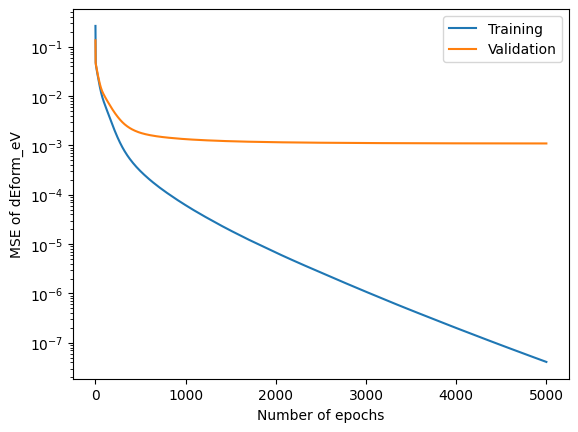

Validation for training data
  Loss function  :  3.3113E-04
Validation for testing data
  Loss function  :  1.1400E-03


In [10]:
#Plot training history
PlotHistory(model_history, "MSE")

#evaluate the Neural Network model for training
result_train = model.evaluate(train_x, train_y, verbose=0)
print("Validation for training data")
print(f"  Loss function  : {result_train[0]: .4E}")

#evaluate the Neural Network model for testing
result_test = model.evaluate(test_x, test_y, verbose=0)
print("Validation for testing data")
print(f"  Loss function  : {result_test[0]: .4E}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


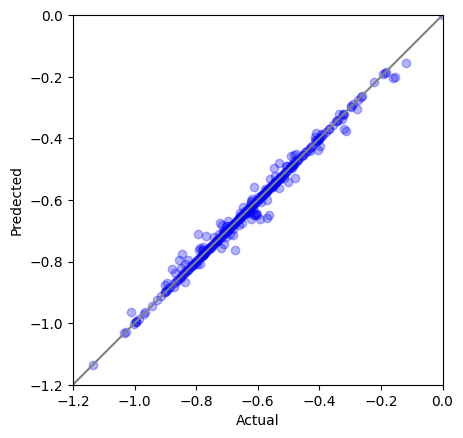

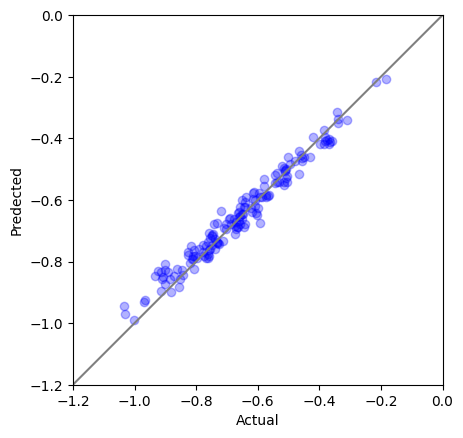

R2 score for training data :  9.8921E-01
R2 score for testing data :  9.6119E-01


In [11]:
#predict the training/testing model
predict_train = model.predict(train_x).flatten()
predict_test = model.predict(test_x).flatten() #unknown data
#plot actual-predicted
PlotCorrelation(train_y, predict_train)
PlotCorrelation(test_y, predict_test)

#evaluate the R2 score
r2score_train = r2_score(train_y, predict_train)
r2score_test = r2_score(test_y, predict_test)
print(f"R2 score for training data : {r2score_train: .4E}")
print(f"R2 score for testing data : {r2score_test: .4E}")

In [12]:
hist = pd.DataFrame(model_history.history)
hist["Epoch"] = model_history.epoch
print(min(hist["loss"]))

4.08623677117248e-08


In [13]:
#read input data
filename_inp = "magn_CoFe9.csv"
target = "dEform_eV"
df = pd.read_csv(filename_inp)

#separate X/Y data
new_data_x = df[["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"]]
new_data_y = df[[target]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


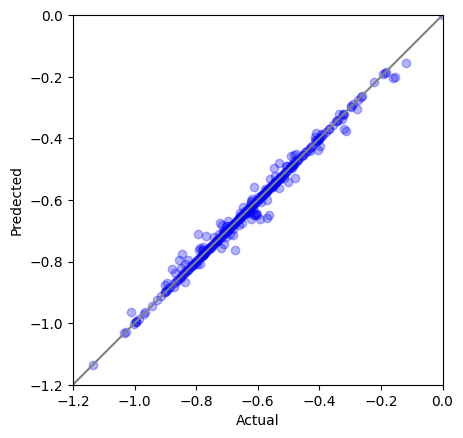

R2 score for training data :  9.8921E-01


In [14]:
#predict the training/testing model
predict_train = model.predict(train_x).flatten()

#plot actual-predicted
PlotCorrelation(train_y, predict_train)


#evaluate the R2 score
r2score_train = r2_score(train_y, predict_train)

print(f"R2 score for training data : {r2score_train: .4E}")


# Run All

Building a model...


/opt/miniconda3/envs/mp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 1024)           │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,521 (5.05 MB)

 Trainable params: 1,323,521 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

Fitting the model started ...
Validation for training data
  Loss function  :  3.5730E-04
Validation for testing data
  Loss function  :  1.1394E-03
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


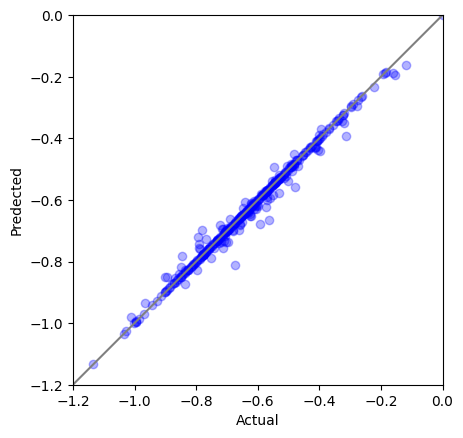

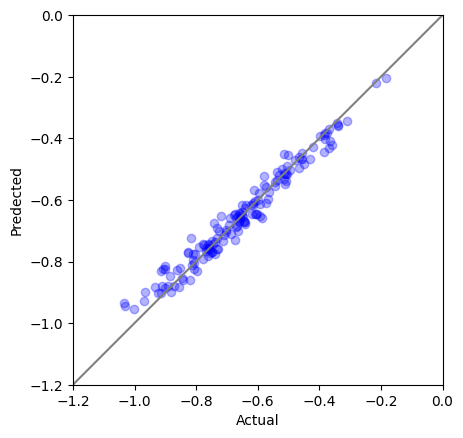

R2 score for training data :  9.8835E-01
R2 score for testing data :  9.6121E-01


In [27]:
print("Building a model...")

#Set Neural Network architecture
model = keras.Sequential()
# model.add(Dense(256, activation="relu", input_shape=[train_x.shape[1]]))
# model.add(Dense(256, activation="relu"))
# model.add(Dense(256, activation="relu"))
# model.add(Dense( 1))

model.add(Dense(1024, activation="relu", input_shape=[train_x.shape[1]]))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense( 1))

#compile the model
model.compile(loss="MSE", optimizer="SGD", metrics=["MSE"])
# model.compile(loss="MSE", optimizer="SGD", metrics=["MAE"])
model.summary()

print("Fitting the model started ...")
model_history = model.fit(train_x, train_y, epochs =3000, validation_split =0.3, verbose =0)

#Plot training history
# PlotHistory(model_history, "MSE")

#evaluate the Neural Network model for training
result_train = model.evaluate(train_x, train_y, verbose=0)
print("Validation for training data")
print(f"  Loss function  : {result_train[0]: .4E}")

#evaluate the Neural Network model for testing
result_test = model.evaluate(test_x, test_y, verbose=0)
print("Validation for testing data")
print(f"  Loss function  : {result_test[0]: .4E}")

#predict the training/testing model
predict_train = model.predict(train_x).flatten()
predict_test = model.predict(test_x).flatten() #unknown data
#plot actual-predicted
PlotCorrelation(train_y, predict_train)
PlotCorrelation(test_y, predict_test)

#evaluate the R2 score
r2score_train = r2_score(train_y, predict_train)
r2score_test = r2_score(test_y, predict_test)
print(f"R2 score for training data : {r2score_train: .4E}")
print(f"R2 score for testing data : {r2score_test: .4E}")

#statistic graient dicent method(SDG)

MSE, 512+512+512+512+512
Loss function  :  1.3724E-03
R2 score for training data :  9.8425E-01
R2 score for testing data :  9.5328E-01

MSE, 1024+512+512+512+512
Loss function  :  1.3359E-03
R2 score for training data :  9.8424E-01
R2 score for testing data :  9.5452E-01

1.2588E-03
R2 score for training data :  9.8648E-01
R2 score for testing data :  9.5715E-01

R2 score for training data :  9.8758E-01
R2 score for testing data :  9.6394E-01

MSE, 512+512+512+512+256
Loss function  :  1.5743E-03
R2 score for training data :  9.8563E-01
R2 score for testing data :  9.4641E-01

MAE, 512+512+512+512+512
R2 score for training data :  9.8349E-01
R2 score for testing data :  9.4860E-01

